#CNN

In [14]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten,ReLU,Dense
import matplotlib.pyplot as plt

In [2]:
(X_train,y_train), (X_test,y_test)=mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
X_train=X_train.reshape(-1,28,28,1)/255.0
X_test=X_test.reshape(-1,28,28,1)/255.0

In [3]:
X_train.shape

(60000, 28, 28)

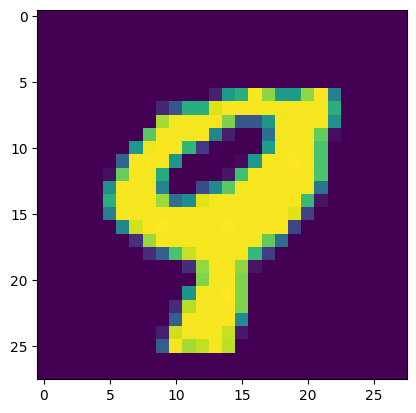

In [9]:
plt.imshow(X_train[772])

CNN

In [17]:
cnn_model=Sequential([
    Conv2D(32,(3,3),input_shape=(28,28,1)),
    ReLU(),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(64,(3,3)),
    ReLU(),
    MaxPooling2D((2,2)),
    Conv2D(128,(3,3)),
    ReLU(),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(128,activation='relu'),
    Dense(64,activation='relu'),
    Dense(32,activation='relu'),
    Dense(10,activation='softmax')
    ])

In [19]:
cnn_model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [31]:
cnn_model.fit(X_train,y_train,epochs=3,batch_size=64,validation_data=(X_test,y_test))

Epoch 1/3
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9949 - loss: 0.0185 - val_accuracy: 0.9836 - val_loss: 0.0806
Epoch 2/3
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9975 - loss: 0.0084 - val_accuracy: 0.9864 - val_loss: 0.0653
Epoch 3/3
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9970 - loss: 0.0115 - val_accuracy: 0.9883 - val_loss: 0.0563


#GERÇEK ZAMANLI TAHMİN

Resmi giriniz:5.png.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Tahmin edilen sayı: 1


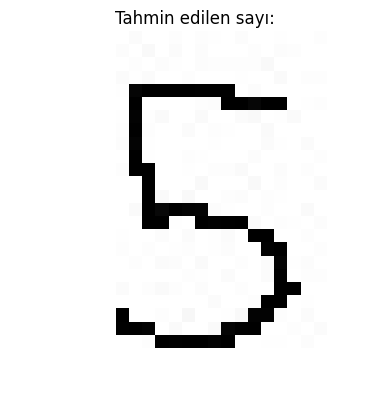

In [32]:
from PIL import Image
import numpy as np
def tahmin(resim_yolu):
  img=Image.open(resim_yolu).convert('L')
  img=img.resize((28,28))
  img=np.array(img)
  img_array=img.reshape(1,28,28,1)/255.0
  prediction=cnn_model.predict(img_array)
  predicted_number=np.argmax(prediction)
  print("Tahmin edilen sayı:",predicted_number)
  plt.imshow(img,cmap='gray')
  plt.title("Tahmin edilen sayı:".format(predicted_number))
  plt.axis('off')
  plt.show()
giris=input("Resmi giriniz:")
tahmin(giris)